In [9]:
import pandas
import matplotlib.pyplot as plt
import numpy as np

plt.style.use('ggplot')


# Load INS data from 2.bag
ins_data_2 = pandas.read_csv('csv/2-vectornav-ins.csv')
ins_data_2 = ins_data_2.drop(columns=['.header.stamp.secs','.header.stamp.nsecs'])
ins_data_2['time'] = pandas.to_datetime(ins_data_2['time'])
ins_data_2['time'] = (ins_data_2['time'] - ins_data_2['time'][0]).astype('timedelta64[ns]').astype('int64')*1e-9
ins_data_2 = ins_data_2.set_index('time')
# Mangitude of speed
ins_data_2['.mag_speed'] = (ins_data_2['.NedVel.y']**2 + ins_data_2['.NedVel.x']**2)**(1/2)


# load Odom data from ekf_2.bag
ekf_data_2 = pandas.read_csv('csv/ekf_2-golfcart_ekf-combined_state.csv')
ekf_data_2 = ekf_data_2.drop(columns=['.header.stamp.secs','.header.stamp.nsecs'])
ekf_data_2['time'] = pandas.to_datetime(ekf_data_2['time'])
ekf_data_2['time'] = (ekf_data_2['time'] - ekf_data_2['time'][0]).astype('timedelta64[ns]').astype('int64')*1e-9
ekf_data_2 = ekf_data_2.set_index('time')
ekf_data_2['.mag_speed'] = (ekf_data_2['.twist.twist.linear.x']**2 + ekf_data_2['.twist.twist.linear.y']**2)**0.5
ekf_data_2.head()


,.header.seq,.header.frame_id,.child_frame_id,.pose.pose.position.x,.pose.pose.position.y,.pose.pose.position.z,.pose.pose.orientation.x,.pose.pose.orientation.y,.pose.pose.orientation.z,.pose.pose.orientation.w,.pose.covariance,.twist.twist.linear.x,.twist.twist.linear.y,.twist.twist.linear.z,.twist.twist.angular.x,.twist.twist.angular.y,.twist.twist.angular.z,.twist.covariance,.mag_speed
time,,,,,,,,,,,,,,,,,,,
0.000000,1,world,vectornav,0.0,0.0,0.0,0.0,0.0,-0.013707,0.999906,"(1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, ...",0.0,0.0,0.0,0.0,0.0,0.0,"(1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, ...",0.0
0.019942,2,world,vectornav,0.0,0.0,0.0,0.0,0.0,-0.013707,0.999906,"(1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, ...",0.0,0.0,0.0,0.0,0.0,0.0,"(1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, ...",0.0
0.039853,3,world,vectornav,0.0,0.0,0.0,0.0,0.0,-0.013707,0.999906,"(1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, ...",0.0,0.0,0.0,0.0,0.0,0.0,"(1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, ...",0.0
0.059859,4,world,vectornav,0.0,0.0,0.0,0.0,0.0,-0.013707,0.999906,"(1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, ...",0.0,0.0,0.0,0.0,0.0,0.0,"(1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, ...",0.0
0.079841,5,world,vectornav,0.0,0.0,0.0,0.0,0.0,-0.013707,0.999906,"(1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, ...",0.0,0.0,0.0,0.0,0.0,0.0,"(1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, ...",0.0


<Figure size 432x288 with 0 Axes>

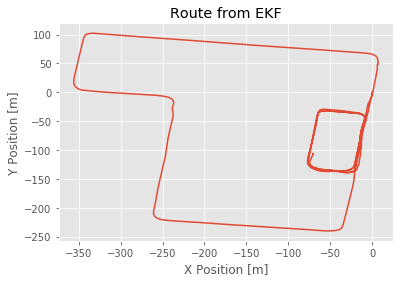

<Figure size 432x288 with 0 Axes>

In [7]:
plt.plot(ekf_data_2['.pose.pose.position.x'],ekf_data_2['.pose.pose.position.y'])
plt.xlabel('X Position [m]')
plt.ylabel('Y Position [m]')
plt.title('Route from EKF')
plt.figure()

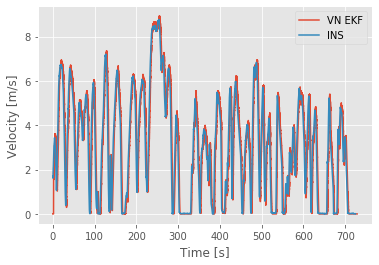

In [27]:
plt.plot(ekf_data_2.index,ekf_data_2['.mag_speed'],label='VN EKF')
plt.plot(ins_data_2.index,ins_data_2['.mag_speed'],label='INS')
plt.xlabel('Time [s]')
plt.ylabel('Velocity [m/s]')
plt.legend()

In [34]:
ekf_when_zeroV = ekf_data_2[ekf_data_2['.mag_speed'] < 1e-1].copy()

# Code accelerations by stop
ekf_when_zeroV['group'] = None
c_time = ekf_when_zeroV.index[0]
group = 0
for t in ekf_when_zeroV.index:
    if t - c_time > 2.5: # Seperation time in seconds. Tune according to dataset
        group += 1  
    ekf_when_zeroV.at[t,'group'] = group
    c_time = t
for i in range(ekf_when_zeroV['group'].max()):
    i +=1 # range gives 0 to n, need 1 to n
    seq = ekf_when_zeroV[ekf_when_zeroV['group']==i].index
    
    print("Stop Group # ",i," Start Seq: ",seq.min(), " End Seq: ",seq.max())


Stop Group #  1  Start Seq:  89.95309200000001  End Seq:  90.801367
Stop Group #  2  Start Seq:  106.82122100000001  End Seq:  106.869195
Stop Group #  3  Start Seq:  110.065329  End Seq:  115.16525700000001
Stop Group #  4  Start Seq:  137.400994  End Seq:  137.489216
Stop Group #  5  Start Seq:  166.92936400000002  End Seq:  174.713252
Stop Group #  6  Start Seq:  287.80512600000003  End Seq:  290.700597
Stop Group #  7  Start Seq:  304.489329  End Seq:  332.025216
Stop Group #  8  Start Seq:  353.64105600000005  End Seq:  354.421327
Stop Group #  9  Start Seq:  383.485071  End Seq:  387.280596
Stop Group #  10  Start Seq:  406.49327300000004  End Seq:  413.14520100000004
Stop Group #  11  Start Seq:  455.041218  End Seq:  456.617245
Stop Group #  12  Start Seq:  475.921258  End Seq:  476.94524500000006
Stop Group #  13  Start Seq:  525.1372590000001  End Seq:  535.9692550000001
Stop Group #  14  Start Seq:  551.625346  End Seq:  557.777266
Stop Group #  15  Start Seq:  620.149265  E

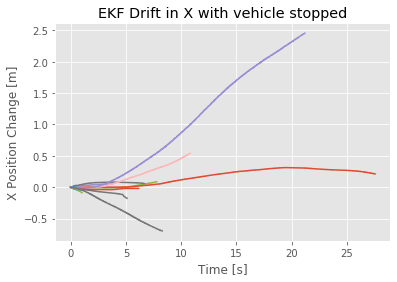

In [41]:
for i in range (group):
    data = ekf_when_zeroV[ekf_when_zeroV['group'] == i]
    plt.plot(data.index - data.index[0], data['.pose.pose.position.x'] - data.iloc[0]['.pose.pose.position.x'],label=i)
    plt.xlabel('Time [s]')
    plt.ylabel('X Position Change [m]')
    plt.title('EKF Drift in X with vehicle stopped')

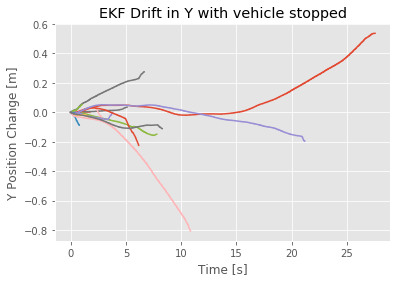

In [37]:
for i in range (group):
    data = ekf_when_zeroV[ekf_when_zeroV['group'] == i]
    plt.plot(data.index - data.index[0], data['.pose.pose.position.y'] - data.iloc[0]['.pose.pose.position.y'],label=i)
    plt.xlabel('Time [s]')
    plt.ylabel('Y Position Change [m]')
    plt.title('EKF Drift in Y with vehicle stopped')

In [ ]:
for i in range (group):
    data = ekf_when_zeroV[ekf_when_zeroV['group'] == i]
    plt.plot(data.index - data.index[0], data['.RPY.z'] - data.iloc[0]['.RPY.z'],label=i)
    plt.xlabel('Time [s]')
    plt.ylabel('$\\theta$ Position Change [deg]')
    plt.title('INS Drift in $\\theta$ with vehicle stopped')